# Describing Caravan Customers

Capstone Project: Predicting and Explaining Caravan Policy Ownership

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

##  **Introduction**

A Norwegian insurance company was interested in a machine learning solution to find best customers to market its caravan insurance product. Without sending mass email to all customers, it is cost effective for the company to identify best possible customers who will buy caravan insurance and only approach those customers.

Dataset: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29

**Research questions**

In this section, following research questions are solved.

Q2. **Describe** the actual or potential customers; and possibly explain why these customers buy a caravan policy.

Q5. What **frequent associations** can be identified in the product ownership data?

**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items.
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

##  **Approach**

*  Exploratory Data Analysis (EDA):

    Market Basket analysis

    Approach 1 - Apriori Algorithm

    Aprroach 2 - Fpgrowth Algorithm

    





**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import squarify
import networkx as nx
import warnings
import matplotlib as mpl
#import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

!pip install squarify
import squarify

**Loading COIL 2000 Dataset**

In [ ]:
# this is the original file. using for exploratory data analysis
df1 = pd.read_csv("/content/ticdata2000_w_hd.csv")
# this is the file given for evaluation
df2 = pd.read_csv("/content/ticeval2000_w_hd.csv")
df2_tg = pd.read_csv("/content/tictgts2000.txt")
df2_tg.columns=['po_ins_pol_caravan']
# combining target column to validation file
df3=df2.merge(df2_tg, left_index=True, right_index=True)
# using the encoded file prepared in prediction task
df_tr = pd.read_csv("/content/df_oh_tr.csv")
df_val = pd.read_csv("/content/df_oh_val.csv")

In [ ]:
# Using all data to make a larger sample to apply association rules
df = pd.concat([df1,df3])
df        = df.reset_index()
print(df1.shape)
print(df3.shape)
df.shape

(5822, 86)
(3999, 86)


(9821, 86)

In [ ]:
df.head()

,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,sd_rel_living_tg,sd_rel_other,sd_rel_no_singles,sd_hshold_wo_children,sd_hshold_w_children,sd_education_higher,sd_education_medium,sd_education_lower,sd_empst_high,sd_empst_Entrepr,sd_empst_farmer,sd_empst_mdl_mgmt,sd_empst_skill_labour,sd_empst_unskill_labour,sd_socialclassA,sd_socialclassB1,sd_socialclassB2,sd_socialclassC,sd_socialclassD,sd_rentedhouse,sd_homeowners,sd_car_1,sd_car_2,sd_car_0,sd_health_ins_national,sd_health_ins_private,sd_income_l_30k,sd_income_30k_45k,sd_income_45k_75k,sd_income_75k_122k,sd_income_g_123k,sd_income_avg,sd_p_power_class,po_ins_pol_thirdparty_pvt,po_ins_pol_thirdparty_firms,po_ins_pol_thirdparty_agri,po_ins_pol_car,po_ins_pol_del_van,po_ins_pol_motorcycle_sc,po_ins_pol_lorry,po_ins_pol_trailer,po_ins_pol_tractor,po_ins_pol_agri_machines,po_ins_pol_moped,po_ins_pol_life,po_ins_pol_accident_ins_pvt,po_ins_pol_accident_ins_fam,po_ins_pol_disability,po_ins_pol_fire,po_ins_pol_surfboard,po_ins_pol_boat,po_ins_pol_bicycle,po_ins_pol_property,po_ins_pol_social security,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_thirdparty_firms,po_no_ins_pol_thirdparty_agri,po_no_ins_pol_car,po_no_ins_pol_del_van,po_no_ins_pol_motorcycle_sc,po_no_ins_pol_lorry,po_no_ins_pol_trailer,po_no_ins_pol_tractor,po_no_ins_pol_agri_machines,po_no_ins_pol_moped,po_no_ins_pol_life,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_fire,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# adding index as customer id
df        = df.rename_axis('customer_id').reset_index()
df_tr   = df_tr.rename_axis('customer_id').reset_index()
df_val = df_val.rename_axis('customer_id').reset_index()

In [ ]:
df_tr.head()

,customer_id,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_car,po_no_ins_pol_life,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_boat,po_ins_pol_caravan,dr_no_car_tptypvt,dr_no_boat_famacc,sd_no_of_houses_1,sd_no_of_houses_10,sd_no_of_houses_2,sd_no_of_houses_3,sd_no_of_houses_4,sd_no_of_houses_5,sd_no_of_houses_6,sd_no_of_houses_7,sd_no_of_houses_8,sd_avg_age_band_1,sd_avg_age_band_2,sd_avg_age_band_3,sd_avg_age_band_4,sd_avg_age_band_5,sd_avg_age_band_6,sd_religion_catholic_0,sd_religion_catholic_1,sd_religion_catholic_2,sd_religion_catholic_3,sd_religion_catholic_4,sd_religion_catholic_5,sd_religion_catholic_6,sd_religion_catholic_7,sd_religion_catholic_8,sd_religion_catholic_9,sd_religion_protestant_0,sd_religion_protestant_1,sd_religion_protestant_2,sd_religion_protestant_3,sd_religion_protestant_4,sd_religion_protestant_5,sd_religion_protestant_6,sd_religion_protestant_7,sd_religion_protestant_8,sd_religion_protestant_9,sd_religion_other_0,sd_religion_other_1,sd_religion_other_2,sd_religion_other_3,sd_religion_other_4,sd_religion_other_5,sd_rel_married_0,sd_rel_married_1,sd_rel_married_2,sd_rel_married_3,sd_rel_married_4,sd_rel_married_5,sd_rel_married_6,sd_rel_married_7,sd_rel_married_8,sd_rel_married_9,sd_rel_living_tg_0,sd_rel_living_tg_1,sd_rel_living_tg_2,sd_rel_living_tg_3,sd_rel_living_tg_4,sd_rel_living_tg_5,sd_rel_living_tg_6,sd_rel_living_tg_7,sd_rel_other_0,sd_rel_other_1,sd_rel_other_2,sd_rel_other_3,sd_rel_other_4,sd_rel_other_5,sd_rel_other_6,sd_rel_other_7,sd_rel_other_8,sd_rel_other_9,sd_rel_no_singles_0,sd_rel_no_singles_1,sd_rel_no_singles_2,sd_rel_no_singles_3,sd_rel_no_singles_4,sd_rel_no_singles_5,sd_rel_no_singles_6,sd_rel_no_singles_7,sd_rel_no_singles_8,sd_rel_no_singles_9,sd_hshold_wo_children_0,sd_hshold_wo_children_1,sd_hshold_wo_children_2,sd_hshold_wo_children_3,sd_hshold_wo_children_4,sd_hshold_wo_children_5,sd_hshold_wo_children_6,sd_hshold_wo_children_7,sd_hshold_wo_children_8,sd_hshold_wo_children_9,sd_education_higher_0,sd_education_higher_1,sd_education_higher_2,sd_education_higher_3,sd_education_higher_4,sd_education_higher_5,sd_education_higher_6,sd_education_higher_7,sd_education_higher_8,sd_education_higher_9,sd_education_medium_0,sd_education_medium_1,sd_education_medium_2,sd_education_medium_3,sd_education_medium_4,sd_education_medium_5,sd_education_medium_6,sd_education_medium_7,sd_education_medium_8,sd_education_medium_9,sd_education_lower_0,sd_education_lower_1,sd_education_lower_2,sd_education_lower_3,sd_education_lower_4,sd_education_lower_5,sd_education_lower_6,sd_education_lower_7,sd_education_lower_8,sd_education_lower_9,sd_empst_high_0,sd_empst_high_1,sd_empst_high_2,sd_empst_high_3,sd_empst_high_4,sd_empst_high_5,sd_empst_high_6,sd_empst_high_7,sd_empst_high_8,sd_empst_high_9,sd_empst_Entrepr_0,sd_empst_Entrepr_1,sd_empst_Entrepr_2,sd_empst_Entrepr_3,sd_empst_Entrepr_4,sd_empst_Entrepr_5,sd_empst_farmer_0,sd_empst_farmer_1,sd_empst_farmer_2,sd_empst_farmer_3,sd_empst_farmer_4,sd_empst_farmer_5,sd_empst_farmer_6,sd_empst_farmer_7,sd_empst_farmer_8,sd_empst_farmer_9,sd_empst_mdl_mgmt_0,sd_empst_mdl_mgmt_1,sd_empst_mdl_mgmt_2,sd_empst_mdl_mgmt_3,sd_empst_mdl_mgmt_4,sd_empst_mdl_mgmt_5,sd_empst_mdl_mgmt_6,sd_empst_mdl_mgmt_7,sd_empst_mdl_mgmt_8,sd_empst_mdl_mgmt_9,sd_empst_skill_labour_0,sd_empst_skill_labour_1,sd_empst_skill_labour_2,sd_empst_skill_labour_3,sd_empst_skill_labour_4,sd_empst_skill_labour_5,sd_empst_skill_labour_6,sd_empst_skill_labour_7,sd_empst_skill_labour_8,sd_empst_skill_labour_9,sd_empst_unskill_labour_0,sd_empst_unskill_labour_1,sd_empst_unskill_labour_2,sd_empst_unskill_labour_3,sd_empst_unskill_labour_4,sd_empst_unskill_labour_5,sd_empst_unskill_labour_6,sd_empst_unskill_labour_7,sd_empst_unskill_labour_8,sd_empst_unskill_labour_9,sd_socialclassA_0,sd_socialclassA_1,sd_socialclassA_2,sd_socialclassA_3,sd_socialclassA_4,sd_socialclassA_5,sd_socialclassA_6,sd_socialclassA_7,sd_socialclassA_8,sd_socialclassA_9,sd_socialclassB1_0,sd_socialclassB1_1,sd_socialcl

# Exploratory Data Analysis (EDA)

In [ ]:
# size of datasets
print('df ', df.shape)
print('df_tr ', df_tr.shape)
print('df_val ', df_val.shape)

df  (9821, 88)
df_tr  (5822, 428)
df_val  (4000, 428)


# Data Exploration

In [ ]:
# describe
df.describe(include='all')

,customer_id,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,sd_rel_living_tg,sd_rel_other,sd_rel_no_singles,sd_hshold_wo_children,sd_hshold_w_children,sd_education_higher,sd_education_medium,sd_education_lower,sd_empst_high,sd_empst_Entrepr,sd_empst_farmer,sd_empst_mdl_mgmt,sd_empst_skill_labour,sd_empst_unskill_labour,sd_socialclassA,sd_socialclassB1,sd_socialclassB2,sd_socialclassC,sd_socialclassD,sd_rentedhouse,sd_homeowners,sd_car_1,sd_car_2,sd_car_0,sd_health_ins_national,sd_health_ins_private,sd_income_l_30k,sd_income_30k_45k,sd_income_45k_75k,sd_income_75k_122k,sd_income_g_123k,sd_income_avg,sd_p_power_class,po_ins_pol_thirdparty_pvt,po_ins_pol_thirdparty_firms,po_ins_pol_thirdparty_agri,po_ins_pol_car,po_ins_pol_del_van,po_ins_pol_motorcycle_sc,po_ins_pol_lorry,po_ins_pol_trailer,po_ins_pol_tractor,po_ins_pol_agri_machines,po_ins_pol_moped,po_ins_pol_life,po_ins_pol_accident_ins_pvt,po_ins_pol_accident_ins_fam,po_ins_pol_disability,po_ins_pol_fire,po_ins_pol_surfboard,po_ins_pol_boat,po_ins_pol_bicycle,po_ins_pol_property,po_ins_pol_social security,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_thirdparty_firms,po_no_ins_pol_thirdparty_agri,po_no_ins_pol_car,po_no_ins_pol_del_van,po_no_ins_pol_motorcycle_sc,po_no_ins_pol_lorry,po_no_ins_pol_trailer,po_no_ins_pol_tractor,po_no_ins_pol_agri_machines,po_no_ins_pol_moped,po_no_ins_pol_life,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_fire,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan
count,9821.000000,9821.000000,9821.000000,9821.00000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000,9821.000000
mean,2539.347521,24.254862,1.108747,2.67763,2.996436,5.779452,0.700336,4.637817,1.050199,3.263008,6.189085,0.873027,2.286631,1.887486,3.237043,4.303024,1.483861,3.307606,4.592404,1.898177,0.403319,0.545769,2.877406,2.226759,2.291315,1.650443,1.595255,2.204460,3.742491,1.068323,4.187965,4.819265,6.022197,1.336116,1.956929,6.254760,2.750229,2.577334,3.505855,2.739029,0.808370,0.208024,3.804195,4.259953,0.764790,0.038896,0.073720,2.956725,0.054882,0.170858,0.008859,0.019346,0.093575,0.011506,0.215049,0.202322,0.011506,0.018735,0.023317,1.849201,0.001629,0.015273,0.025354,0.016699,0.045413,0.399959,0.014052,0.021281,0.557275,0.011099,0.040220,0.002240,0.011404,0.034416,0.005193,0.071072,0.079829,0.004582,0.007942,0.004277,0.573974,0.000916,0.005091,0.031463,0.008451,0.013848,0.059668
std,1554.967209,12.917674,0.412120,0.78071,0.804701,2.874041,1.014613,1.721220,1.011152,1.606366,1.896128,0.961937,1.710758,1.779227,1.608980,1.984210,1.644738,1.723142,2.279667,1.813453,0.786822,1.106391,1.846569,1.747970,1.684044,1.742338,1.321456,1.533982,1.944802,1.298250,3.093206,3.093621,1.543766,1.213614,1.596801,2.000015,2.002603,2.073067,1.871126,1.950250,1.173769,0.561857,1.330607,1.998659,0.956522,0.356942,0.50784

**Checking Datatypes, Missing Value, Unique Value**

In [ ]:
#df=df
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()
temp

# Univariate Analysis

**Histograms**

**Frequency Plot Of Customer Main Type**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Customer Main Type')

([<matplotlib.axis.XTick at 0x790b2111c340>,
 [Text(1, 0, 'Successful hedonists'),
  Text(2, 0, 'Driven Growers'),
  Text(3, 0, 'Average Family'),
  Text(4, 0, 'Career Loners'),
  Text(5, 0, 'Living well'),
  Text(6, 0, 'Cruising Seniors'),
  Text(7, 0, 'Retired and Religious'),
  Text(8, 0, 'Family with grown ups'),
  Text(9, 0, 'Conservative families'),
  Text(10, 0, 'Farmers')])

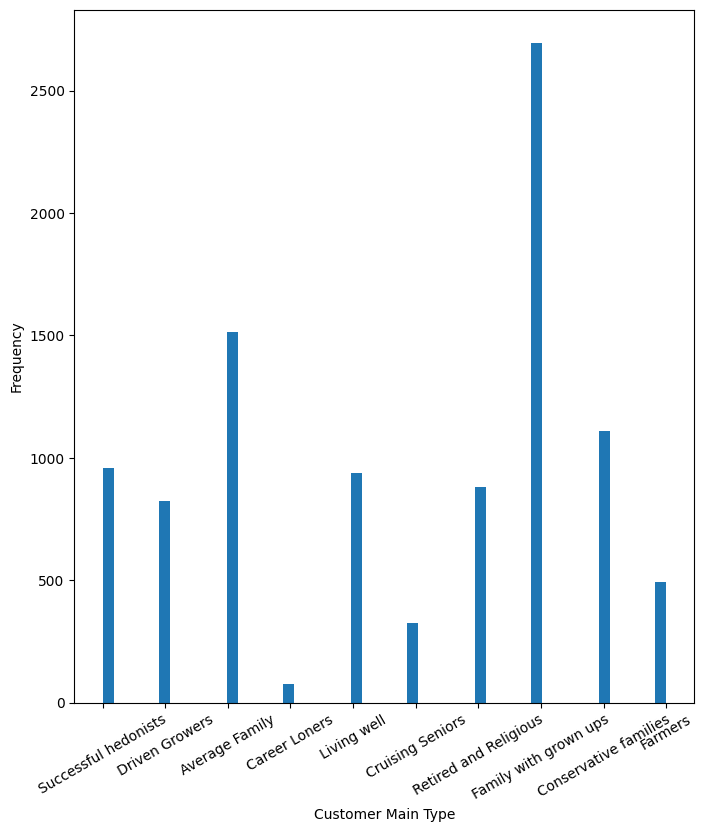

In [ ]:
fig=plt.figure(figsize=(8,9))
df['sd_cust_maintype'].plot.hist(bins = 50)
plt.xlabel('Customer Main Type')
plt.xticks([1, 2,3,4,5,6,7,8,9,10], ['Successful hedonists' ,	'Driven Growers' ,	'Average Family' ,	'Career Loners' ,	'Living well' ,	'Cruising Seniors' ,	'Retired and Religious' ,	'Family with grown ups' ,	'Conservative families' ,	'Farmers' ],       rotation=30)
fig.savefig("cust Main type")


**Frequency Plot Of sd_cust_subtype**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'sd_cust_subtype')

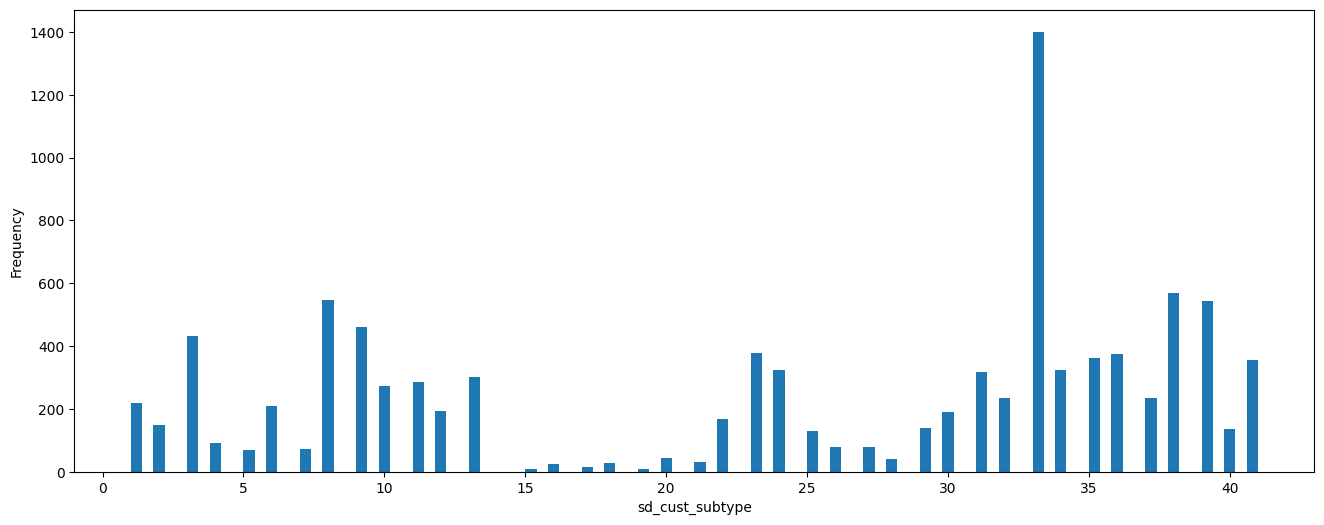

In [ ]:
fig=plt.figure(figsize=(16,6))
df['sd_cust_subtype'].plot.hist(bins = 100)
plt.xlabel('sd_cust_subtype')

customer sub type description

33 Lower class large families

8   Middle class families

**Frequency Plot Of sd_no_of_houses**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'No of Houses')

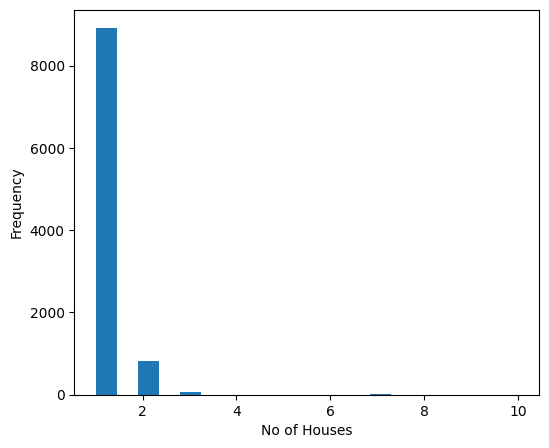

In [ ]:
fig=plt.figure(figsize=(6,5))
df['sd_no_of_houses'].plot.hist(bins = 20)
plt.xlabel('No of Houses')

**Number of car policies**

**po_no_ins_pol_car**

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'No of car policies')

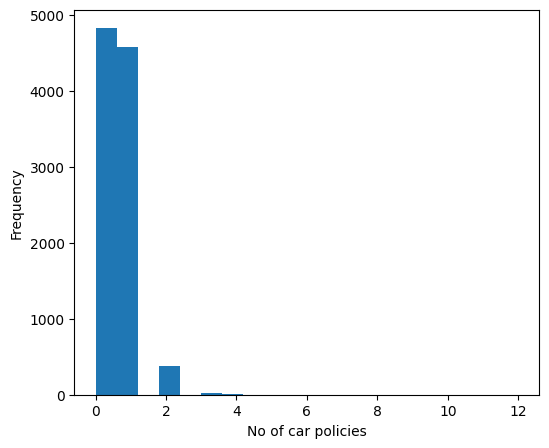

In [ ]:
fig=plt.figure(figsize=(6,5))
df['po_no_ins_pol_car'].plot.hist(bins=20)
plt.xlabel('No of car policies')
fig.savefig("no car policies")

### Top choices

**Choices in Insurance Products**

In [ ]:
import plotly.express as px
df_po_no_insB = df[['po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security','po_ins_pol_caravan' ]]
px.box(df_po_no_insB)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# create dtaset products and mark existance of product as 1 or 0.
df_prd = df[['customer_id','po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security','po_ins_pol_caravan' ]]
#df_prd.head()

In [ ]:
# renaming column to be consistant with other products
df_prd.rename(columns={'po_ins_pol_caravan':'po_no_ins_pol_caravan'},inplace=True)
# bring products to a columns
df_prd2 = df_prd.melt(id_vars=["customer_id"], var_name="product_name1", value_name="product_count").sort_values(['customer_id', 'product_name1']).reset_index(drop=True)

In [ ]:
df_prd2['product_name'] =df_prd2['product_name1'].str.split('po_no_ins_pol_').str[1]

In [ ]:
df_prd2.drop('product_name1', axis = 1, inplace=True)
#Report_Card.drop("Retake",axis=1,inplace=True)

In [ ]:
df_prd3 = pd.DataFrame(df_prd2[df_prd2['product_count']>0])
df_prd3.head()

,customer_id,product_count,product_name
5,0,1,car
9,0,1,fire
31,1,1,fire
41,1,2,thirdparty_pvt
49,2,1,car


**Top 5 First Choices in Products**

In [ ]:
prd5=df_prd3['product_name'].value_counts().iloc[:5]
prd6=prd5.rename_axis('product_name2').reset_index()
prd7=prd6.rename(columns={'product_name2':'product_name', 'product_name':'prd_count'})
prd8=pd.merge(df_prd3, prd7, on='product_name')
prd8.drop('prd_count', axis=1, inplace=True)

prd8['product'] = 'Products'
products = nx.from_pandas_edgelist(prd8, source = 'product', target = 'product_name', edge_attr = True)

In [ ]:
prd5

fire              5357
car               4997
thirdparty_pvt    3918
moped              672
caravan            586
Name: product_name, dtype: int64

{'Products': Text(-0.0024371157310506446, -0.001655650037584332, 'Products'),
 'car': Text(-0.7981293132349516, 0.6066477413630335, 'car'),
 'fire': Text(-0.8210219641237864, -0.5734108817085558, 'fire'),
 'thirdparty_pvt': Text(0.3269258548114581, 0.9460554783120153, 'thirdparty_pvt'),
 'moped': Text(1.0, -0.019161597486617537, 'moped'),
 'caravan': Text(0.29466253827832933, -0.9584750904422911, 'caravan')}

(-1.012229270356784,
 1.1912073062329975,
 -1.1584508001614933,
 1.1460311880312175)

Text(0.5, 1.0, 'Top 5 First Choices in Products')

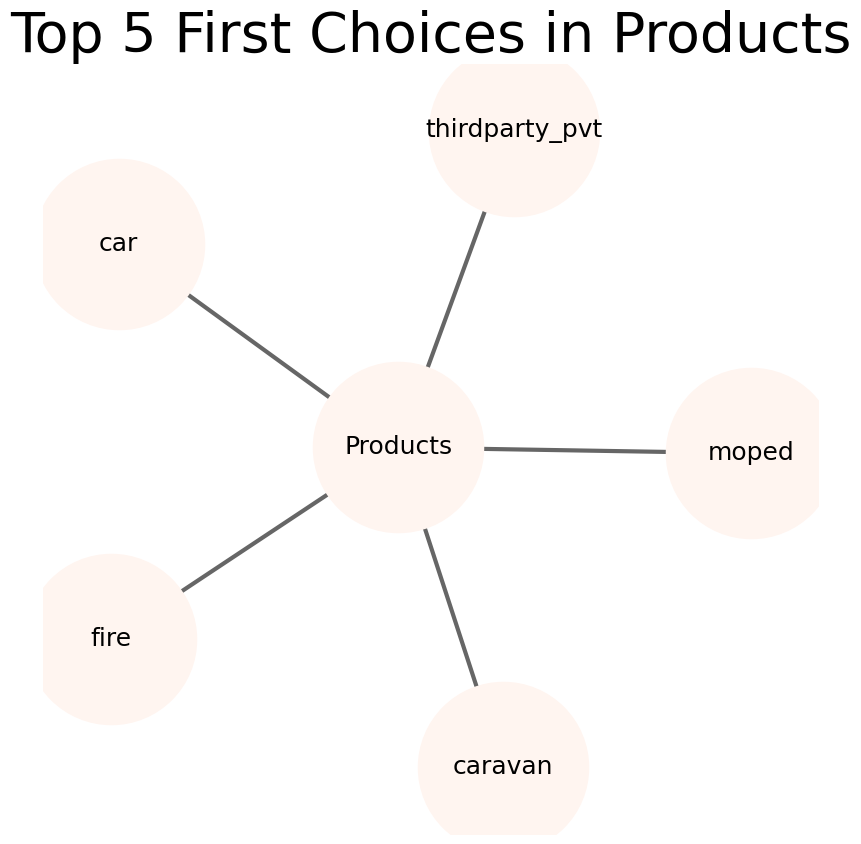

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,10)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 18)
plt.axis('off')
plt.grid()
plt.title('Top 5 First Choices in Products', fontsize = 40)

#plt.show()
plt.savefig("Top_5_Products.png")
#plt.savefig("Top_10_Products", format="PNG")

Bar plot most bought product

<Axes: >

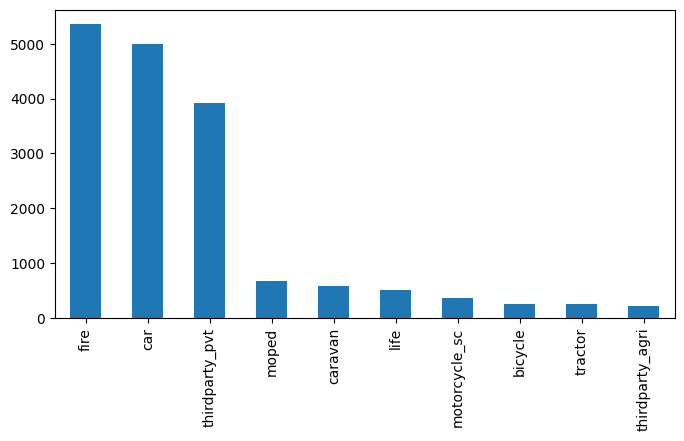

In [ ]:
# Bar plot - Top 10 products
df_freq_products=df_prd3['product_name'].value_counts().iloc[:10]
fig=plt.figure(figsize=(8, 4))
df_freq_products.plot.bar()

Tree map of most bought product

In [ ]:
#array of most bought product
y=df_freq_products.head(5).to_frame()

<Axes: >

Text(0.5, 1.0, 'tree map for frequent products')

(0.0, 100.0, 0.0, 100.0)

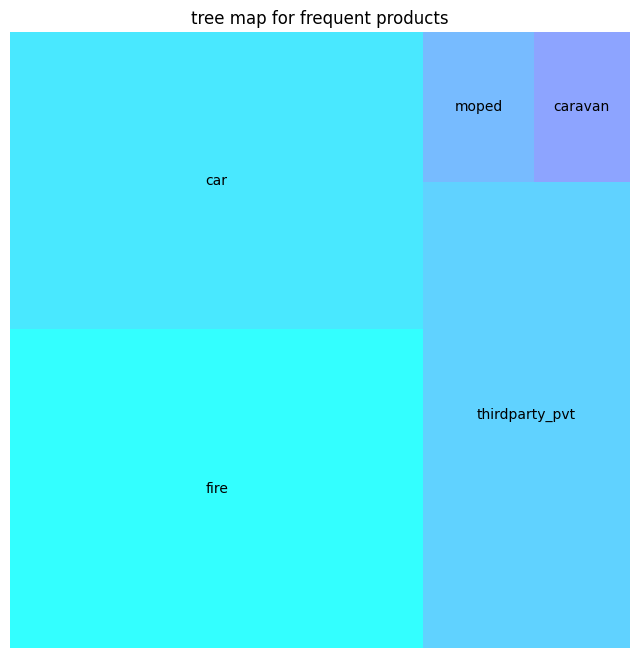

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
color=plt.cm.cool(np.linspace(0,1,10))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

# Q5. What frequent associations can be identified in the product ownership data?

**Most Popular  Products**

In [ ]:
# po_no_ins_pol_thirdparty_pvt
print('popular product in numbers  \n',df['po_no_ins_pol_thirdparty_pvt'].value_counts(), ' \n')
print('popular product in %  \n', df['po_no_ins_pol_thirdparty_pvt'].value_counts()/len(df)*100)

popular product in numbers  
 0    5903
1    3908
2      10
Name: po_no_ins_pol_thirdparty_pvt, dtype: int64  

popular product in %  
 0    60.105896
1    39.792282
2     0.101823
Name: po_no_ins_pol_thirdparty_pvt, dtype: float64


♈ 60% of customers have private third party insurance policies. ♈

<Axes: >

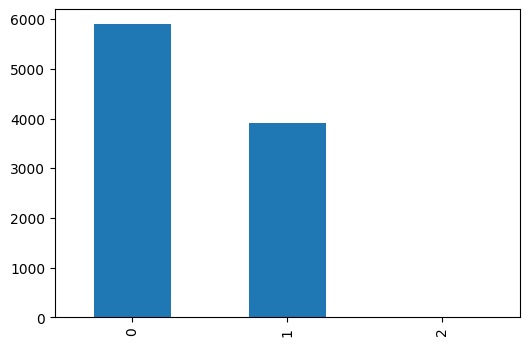

In [ ]:
fig=plt.figure(figsize=(6,4))
df['po_no_ins_pol_thirdparty_pvt'].value_counts().plot(kind='bar')

In [ ]:
# po_no_ins_pol_fire
print('popular product in numbers  \n',df['po_no_ins_pol_fire'].value_counts(), ' \n')
print('popular product in %  \n', df['po_no_ins_pol_fire'].value_counts()/len(df)*100)

popular product in numbers  
 1    5115
0    4464
2     221
3      11
4       6
5       2
7       1
6       1
Name: po_no_ins_pol_fire, dtype: int64  

popular product in %  
 1    52.082273
0    45.453620
2     2.250280
3     0.112005
4     0.061094
5     0.020365
7     0.010182
6     0.010182
Name: po_no_ins_pol_fire, dtype: float64


In [ ]:
# 'po_no_ins_pol_car'
print('popular product in numbers  \n',df['po_no_ins_pol_car'].value_counts(), ' \n')
print('popular product in %  \n', df['po_no_ins_pol_car'].value_counts()/len(df)*100)

popular product in numbers  
 0     4824
1     4580
2      384
3       21
4        8
7        1
6        1
12       1
5        1
Name: po_no_ins_pol_car, dtype: int64  

popular product in %  
 0     49.119234
1     46.634762
2      3.909989
3      0.213828
4      0.081458
7      0.010182
6      0.010182
12     0.010182
5      0.010182
Name: po_no_ins_pol_car, dtype: float64


**Popular selection of products**

In [ ]:
df_inc=pd.DataFrame(df.groupby(['po_no_ins_pol_thirdparty_pvt', 'po_no_ins_pol_fire' , 'po_no_ins_pol_car', 	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,		'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,		'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ,'po_ins_pol_caravan']).size().reset_index(name='counts')).sort_values('counts')
df_inc['percentage_pol_count']=df_inc['counts']/len(df)*100
df_inc[-10:]

,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_fire,po_no_ins_pol_car,po_no_ins_pol_thirdparty_firms,po_no_ins_pol_thirdparty_agri,po_no_ins_pol_del_van,po_no_ins_pol_motorcycle_sc,po_no_ins_pol_lorry,po_no_ins_pol_trailer,po_no_ins_pol_tractor,po_no_ins_pol_agri_machines,po_no_ins_pol_moped,po_no_ins_pol_life,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan,counts,percentage_pol_count
373,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,1.058955
446,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,119,1.211689
359,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,2.331738
186,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,276,2.810304
25,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,480,4.887486
133,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,950,9.673149
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1020,10.385908
398,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1047,10.660829
445,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1248,12.707464
55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1649,16.790551


In [ ]:
display(df_inc[-10:].iloc[:,[0,1,2,11,21,22]])

,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_fire,po_no_ins_pol_car,po_no_ins_pol_moped,po_ins_pol_caravan,counts
373,1,0,1,0,0,104
446,1,1,1,0,1,119
359,1,0,0,0,0,229
186,0,1,1,0,0,276
25,0,0,0,1,0,480
133,0,1,0,0,0,950
0,0,0,0,0,0,1020
398,1,1,0,0,0,1047
445,1,1,1,0,0,1248
55,0,0,1,0,0,1649


**Popular selection of products of customers with caravan policy**

In [ ]:
# filtering records of caravan policy. (target = 1 )
df_cr=df[df['po_ins_pol_caravan'] ==1]
df_cr.po_ins_pol_caravan.value_counts()

1    586
Name: po_ins_pol_caravan, dtype: int64

In [ ]:
df_inc2=pd.DataFrame(df_cr.groupby(['po_no_ins_pol_thirdparty_pvt', 'po_no_ins_pol_fire' , 'po_no_ins_pol_car', 	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,		'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,		'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security', 'po_ins_pol_caravan' ]).size().reset_index(name='counts')).sort_values('counts')
df_inc2['percentage_pol_cnt_all']=df_inc2['counts']/len(df)*100
df_inc2['percentage_pol_cnt_caravan']=df_inc2['counts']/len(df_cr)*100
df_inc2[-15:]

,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_fire,po_no_ins_pol_car,po_no_ins_pol_thirdparty_firms,po_no_ins_pol_thirdparty_agri,po_no_ins_pol_del_van,po_no_ins_pol_motorcycle_sc,po_no_ins_pol_lorry,po_no_ins_pol_trailer,po_no_ins_pol_tractor,po_no_ins_pol_agri_machines,po_no_ins_pol_moped,po_no_ins_pol_life,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan,counts,percentage_pol_cnt_all,percentage_pol_cnt_caravan
14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,0.050911,0.853242
80,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,5,0.050911,0.853242
81,1,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,6,0.061094,1.023891
71,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,0.061094,1.023891
88,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,0.091640,1.535836
58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,0.091640,1.535836
59,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,0.112005,1.877133
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,14,0.142552,2.389078
99,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,0.193463,3.242321
26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,0.285103,4.778157


♈Most common choice of products who select a caravan policy are **third party private, fire and car** policies. ♈

In [ ]:
df_inc2=df_cr[['po_no_ins_pol_thirdparty_pvt', 'po_no_ins_pol_fire' , 'po_no_ins_pol_car', 	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,		'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,		'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ]]
df_inc2['total']=df_inc2.sum(axis = 1)

In [ ]:
df_inc2.head()

,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_fire,po_no_ins_pol_car,po_no_ins_pol_thirdparty_firms,po_no_ins_pol_thirdparty_agri,po_no_ins_pol_del_van,po_no_ins_pol_motorcycle_sc,po_no_ins_pol_lorry,po_no_ins_pol_trailer,po_no_ins_pol_tractor,po_no_ins_pol_agri_machines,po_no_ins_pol_moped,po_no_ins_pol_life,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,total
41,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
45,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
57,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.loc[[97, 98 ]]

,customer_id,index,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,sd_rel_living_tg,sd_rel_other,sd_rel_no_singles,sd_hshold_wo_children,sd_hshold_w_children,sd_education_higher,sd_education_medium,sd_education_lower,sd_empst_high,sd_empst_Entrepr,sd_empst_farmer,sd_empst_mdl_mgmt,sd_empst_skill_labour,sd_empst_unskill_labour,sd_socialclassA,sd_socialclassB1,sd_socialclassB2,sd_socialclassC,sd_socialclassD,sd_rentedhouse,sd_homeowners,sd_car_1,sd_car_2,sd_car_0,sd_health_ins_national,sd_health_ins_private,sd_income_l_30k,sd_income_30k_45k,sd_income_45k_75k,sd_income_75k_122k,sd_income_g_123k,sd_income_avg,sd_p_power_class,po_ins_pol_thirdparty_pvt,po_ins_pol_thirdparty_firms,po_ins_pol_thirdparty_agri,po_ins_pol_car,po_ins_pol_del_van,po_ins_pol_motorcycle_sc,po_ins_pol_lorry,po_ins_pol_trailer,po_ins_pol_tractor,po_ins_pol_agri_machines,po_ins_pol_moped,po_ins_pol_life,po_ins_pol_accident_ins_pvt,po_ins_pol_accident_ins_fam,po_ins_pol_disability,po_ins_pol_fire,po_ins_pol_surfboard,po_ins_pol_boat,po_ins_pol_bicycle,po_ins_pol_property,po_ins_pol_social security,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_thirdparty_firms,po_no_ins_pol_thirdparty_agri,po_no_ins_pol_car,po_no_ins_pol_del_van,po_no_ins_pol_motorcycle_sc,po_no_ins_pol_lorry,po_no_ins_pol_trailer,po_no_ins_pol_tractor,po_no_ins_pol_agri_machines,po_no_ins_pol_moped,po_no_ins_pol_life,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_fire,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan
97,97,97,9,1,2,3,3,0,6,1,2,7,1,1,5,1,4,5,4,0,4,0,0,5,1,0,1,8,0,0,0,9,0,8,1,1,4,5,0,5,4,0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
98,98,98,36,1,2,4,8,2,4,2,2,7,0,2,2,4,3,1,5,4,1,0,0,3,1,4,1,1,4,4,0,2,7,5,3,2,5,4,2,5,3,0,0,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Most of customers have single car policy.

# Market Basket Analysis



**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

Selecting columns

In [ ]:
product_name=df_prd3
product_name.head()

,customer_id,product_count,product_name
5,0,1,car
9,0,1,fire
31,1,1,fire
41,1,2,thirdparty_pvt
49,2,1,car


**Arranging Top Products**

In [ ]:
# counting each product as customers selected
productCountDf = product_name.groupby("product_name",as_index = False)['customer_id'].count()

In [ ]:
productCountDf.sort_values(by=['customer_id'], inplace=True, ascending=False)
productCountDf

,product_name,customer_id
9,fire,5357
5,car,4997
19,thirdparty_pvt,3918
12,moped,672
6,caravan,586
10,life,514
13,motorcycle_sc,362
3,bicycle,249
20,tractor,246
17,thirdparty_agri,209


**Top 20 most frequently purchased products**

In [ ]:
topProdFrame = productCountDf.iloc[0:20,:]
productname= topProdFrame.loc[:,["product_name"]]
productname

,product_name
9,fire
5,car
19,thirdparty_pvt
12,moped
6,caravan
10,life
13,motorcycle_sc
3,bicycle
20,tractor
17,thirdparty_agri


**Customer records containting the most frequently purchased products**

In [ ]:
MarketBasketdf = product_name[0:0]
for i in range(0,19):
    pId = productname.iloc[i]['product_name']
    stDf = product_name[product_name.product_name == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

In [ ]:
MarketBasketdf.head()

,customer_id,product_count,product_name
9,0,1,fire
31,1,1,fire
53,2,1,fire
75,3,1,fire
97,4,1,fire


In [ ]:
print(product_name.shape)
print(MarketBasketdf.shape)

(17917, 3)
(17862, 3)


In [ ]:
display(MarketBasketdf[MarketBasketdf['customer_id'] ==164])

,customer_id,product_count,product_name
3617,164,2,fire
3613,164,1,car
3628,164,2,tractor
3623,164,1,social security
3608,164,1,accident_ins_fam


In [ ]:
display(product_name[product_name['customer_id'] ==164])

,customer_id,product_count,product_name
3608,164,1,accident_ins_fam
3613,164,1,car
3617,164,2,fire
3623,164,1,social security
3628,164,2,tractor


**Putting the items into 1 transaction**

In [ ]:
basket = MarketBasketdf.groupby(['customer_id','product_name'])['product_count'].sum().unstack().reset_index().fillna(0).set_index('customer_id')

In [ ]:
basket.head(10)

product_name,accident_ins_fam,accident_ins_pvt,bicycle,boat,car,caravan,del_van,disability,fire,life,moped,motorcycle_sc,property,social security,thirdparty_agri,thirdparty_firms,thirdparty_pvt,tractor,trailer
customer_id,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# One Hot Encoding

In [ ]:
# Converted the units into 1 encoded value
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.head(10)

size and shape of basket

In [ ]:
basket_sets.size

167124

In [ ]:
basket_sets.shape

(8796, 19)

In [ ]:
display(basket_sets.loc[[164 ]])

product_name,accident_ins_fam,accident_ins_pvt,bicycle,boat,car,caravan,del_van,disability,fire,life,moped,motorcycle_sc,property,social security,thirdparty_agri,thirdparty_firms,thirdparty_pvt,tractor,trailer
customer_id,,,,,,,,,,,,,,,,,,,
164,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [ ]:
# taking a sample of the basket
dummy=basket_sets.head(8000)

# Apriori Algorithm

**Importing Apriori and Association rules Libraries**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Training the Model**

In [ ]:
# Frequent items with support 0.07% using Apriori Algorithm**
frequent_itemsets = apriori(dummy, min_support=0.0007,   use_colnames=True)
# Association rules using Apriori Algorithm
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

In [ ]:
# Sort values based on confidence
apriori_rules2=apriori_rules.sort_values("confidence",ascending=False)

In [ ]:
# Filtering out co-realted products with higher Probability
apriori_rules2[ (apriori_rules2['lift'] >=30) & (apriori_rules2['confidence'] >= 0.01) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2492,"(thirdparty_agri, thirdparty_firms, car)","(tractor, fire)",0.000875,0.024375,0.000875,1.000000,41.025641,0.000854,inf,0.976479
2496,"(thirdparty_agri, thirdparty_firms, fire)","(tractor, car)",0.000875,0.020875,0.000875,1.000000,47.904192,0.000857,inf,0.979982
1826,"(thirdparty_agri, thirdparty_pvt, car)",(tractor),0.000750,0.029000,0.000750,1.000000,34.482759,0.000728,inf,0.971729
2043,"(thirdparty_agri, thirdparty_firms)","(tractor, fire)",0.000875,0.024375,0.000875,1.000000,41.025641,0.000854,inf,0.976479
1389,"(thirdparty_agri, car, del_van)",(tractor),0.000750,0.029000,0.000750,1.000000,34.482759,0.000728,inf,0.971729
1818,"(thirdparty_agri, thirdparty_firms)","(tractor, car)",0.000875,0.020875,0.000875,1.000000,47.904192,0.000857,inf,0.979982
1813,"(thirdparty_firms, thirdparty_agri, car)",(tractor),0.000875,0.029000,0.000875,1.000000,34.482759,0.000850,inf,0.971850
910,"(thirdparty_agri, thirdparty_firms)",(tractor),0.000875,0.029000,0.000875,1.000000,34.482759,0.000850,inf,0.971850
2039,"(thirdparty_agri, thirdparty_firms, fire)",(tractor),0.000875,0.029000,0.000875,1.000000,34.482759,0.000850,inf,0.971850
2518,"(thirdparty_agri, car, thirdparty_pvt, fire)",(tractor),0.000750,0.029000,0.000750,1.000000,34.482759,0.000728,inf,0.971729


Antecedent and Consequent

The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.

In [ ]:
# Plot Lift Vs Coverage(confidence)
def plot_metrics_relationship(rule_matrix, al, col1, col2):
    """
    desc: shows the relationship between the two input columns
    @params:
        - rule_matrix: the matrix containing the result of a rule (apriori or Fp Growth)
        - col1: first column
        - col2: second column
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1],
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} {} vs {}'.format(al, col1, col2))

    plt.savefig('Lift vs confidence')

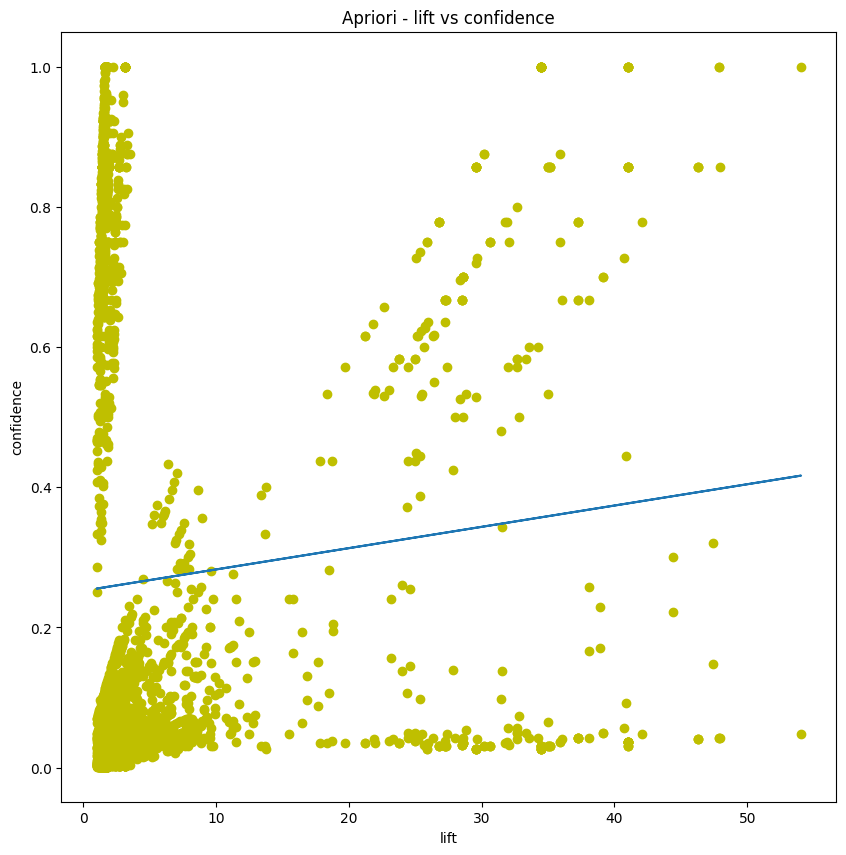

In [ ]:
plot_metrics_relationship(apriori_rules2, al='Apriori -', col1='lift', col2='confidence')

**Support**

Support is a measure that indicates the frequent appearance of a variable set or itemset in a database. Let X be the itemset and T a set of transactions in  then the support of X with respect to T can be measured as

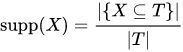


Basically, the above measure tells the proportion of T transactions in the database which contains the item set X

support tells how popular an item is based on the proportion of all transactions that are included. The popularity is met if it corresponds to the user-specified support thresold. For instance, a support threshold set to 0.2 (20%) means that the user wants all the items that occur together in at least 20% of all transactions.
A High support thresold does not give much more item combination, so reducing the value might be helpful to see much more item combinations for marketing purpose.

**Confidence**

Confidence is a measure that indicates how often a rule appears to be true. Let A rule X ⇒ Y with respect to a set of transaction T, is the proportion of the transaction that contains X and Y at the same transaction, where X and Y are itemsets. In terms of support, the confidence of a rule can be defined as

conf(X⇒Y) = supp(X U Y)／supp(X).

For example, in the given table confidence of rule {product 2, product 3} ⇒ {product 1} is 0.2/0.2 = 1.0 in this database. This means 100% of the time the customer buys product 2 and product 3 together, product 1 bought as well.

**Lift**

The lift value is a measure of importance of a rule.

A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

In data mining and association rule learning, lift is a measure of the performance of a targeting model (association rule) at predicting or classifying cases as having an enhanced response (with respect to the population as a whole), measured against a random choice targeting model. A targeting model is doing a good job if the response within the target (T) is much better than the baseline (B) average for the population as a whole. Lift is simply the ratio of these values: target response divided by average response. Mathematically,

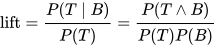


For example, suppose a population has an average response rate of 5%, but a certain model (or rule) has identified a segment with a response rate of 20%. Then that segment would have a lift of 4.0 (20%/5%).

If lift=1, A and B are independent (according to probability theory, support(A U B) = support(A) x support(B) given A and B are independent).

If lift > 1, A and B are positively correlated. Namely, the 2 item sets lift the likelihood of each another.

If lift < 1, A and B are negatively correlated.

# Recommendations using Apriori Algorithm

In [ ]:
apriori_caravan = apriori_rules2[ (apriori_rules2['consequents']== {'caravan'}      )]
apriori_caravan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
280,"(car, boat)",(caravan),0.003750,0.0675,0.001625,0.433333,6.419753,0.001372,1.645588,0.847409
25,(boat),(caravan),0.005000,0.0675,0.001875,0.375000,5.555556,0.001537,1.492000,0.824121
297,"(fire, boat)",(caravan),0.003125,0.0675,0.001125,0.360000,5.333333,0.000914,1.457031,0.815047
1151,"(car, fire, boat)",(caravan),0.002875,0.0675,0.001000,0.347826,5.152979,0.000806,1.429833,0.808261
2251,"(social security, car, thirdparty_pvt, fire)",(caravan),0.006500,0.0675,0.001500,0.230769,3.418803,0.001061,1.212250,0.712129
1903,"(social security, thirdparty_pvt, fire)",(caravan),0.007125,0.0675,0.001500,0.210526,3.118908,0.001019,1.181167,0.684250
1313,"(social security, thirdparty_pvt, car)",(caravan),0.007500,0.0675,0.001500,0.200000,2.962963,0.000994,1.165625,0.667506
660,"(social security, thirdparty_pvt)",(caravan),0.008250,0.0675,0.001500,0.181818,2.693603,0.000943,1.139722,0.633980
1231,"(social security, car, fire)",(caravan),0.009125,0.0675,0.001625,0.178082,2.638255,0.001009,1.134542,0.626680
47,(disability),(caravan),0.004375,0.0675,0.000750,0.171429,2.539683,0.000455,1.125431,0.608914


In [ ]:
# print 1st association rule
apriori_rules2.iloc[0,1]

frozenset({'fire'})

In [ ]:
apriori_rules2.iloc[0,:]

antecedents           (thirdparty_agri, thirdparty_pvt)
consequents                                      (fire)
antecedent support                             0.000875
consequent support                               0.6085
support                                        0.000875
confidence                                          1.0
lift                                           1.643385
leverage                                       0.000343
conviction                                          inf
zhangs_metric                                  0.391843
Name: 824, dtype: object

In [ ]:
apriori_rules.shape

(2568, 10)

from sample of 8000 records, apriori algorithm has mined 2568 rules:
rule with low support and high confidence is prefered.  ♈

In [ ]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,2568):
        if item == apriori_rules2.iloc[i,0]:
            recommend.append(apriori_rules2.iloc[i,1])

    return recommend

**5 Recommendations with Caravan product**

In [ ]:
product_name = {'caravan'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'car'})
frozenset({'fire'})
frozenset({'thirdparty_pvt'})
frozenset({'car', 'fire'})
frozenset({'thirdparty_pvt', 'fire'})


customers who bought a caravan policy also bought family accident insurance, bicycle, boat, car and delivary van policy  ♈

# Fpgrowth Algorithm

**Importing Fpgrowth Libraries**

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

**Training the Model**

In [ ]:
# Frequent Items with support 0.07% using Fpgrowth Algorithm
freq_items=fpgrowth(dummy,min_support=.0007,use_colnames=True)
# Association Rules using Fpgrowth Algorithm
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=0.8)

In [ ]:
# Sort values based on confidence
fpgrowth_rules2=fpgrowth_rules.sort_values("confidence",ascending=False)

In [ ]:
# Filtering out co-realted products with higher Probability
fpgrowth_rules2[ (fpgrowth_rules2['lift'] >=30) & (fpgrowth_rules2['confidence'] >= 0.01) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2073,"(thirdparty_agri, thirdparty_firms, fire)",(tractor),0.000875,0.029000,0.000875,1.000000,34.482759,0.000850,inf,0.971850
2077,"(thirdparty_agri, thirdparty_firms)","(tractor, fire)",0.000875,0.024375,0.000875,1.000000,41.025641,0.000854,inf,0.976479
2648,"(thirdparty_agri, car, del_van)","(tractor, fire)",0.000750,0.024375,0.000750,1.000000,41.025641,0.000732,inf,0.976357
1562,"(thirdparty_agri, disability)","(tractor, fire)",0.000750,0.024375,0.000750,1.000000,41.025641,0.000732,inf,0.976357
1557,"(thirdparty_agri, fire, disability)",(tractor),0.000750,0.029000,0.000750,1.000000,34.482759,0.000728,inf,0.971729
1544,"(thirdparty_agri, disability)",(tractor),0.000750,0.029000,0.000750,1.000000,34.482759,0.000728,inf,0.971729
2040,"(thirdparty_agri, thirdparty_firms)",(tractor),0.000875,0.029000,0.000875,1.000000,34.482759,0.000850,inf,0.971850
2584,"(thirdparty_agri, del_van)",(tractor),0.000875,0.029000,0.000875,1.000000,34.482759,0.000850,inf,0.971850
2059,"(thirdparty_firms, thirdparty_agri, car)",(tractor),0.000875,0.029000,0.000875,1.000000,34.482759,0.000850,inf,0.971850
1697,"(thirdparty_agri, car, thirdparty_pvt)","(tractor, fire)",0.000750,0.024375,0.000750,1.000000,41.025641,0.000732,inf,0.976357


In [ ]:
fpgrowth_rules2.shape

(2698, 10)

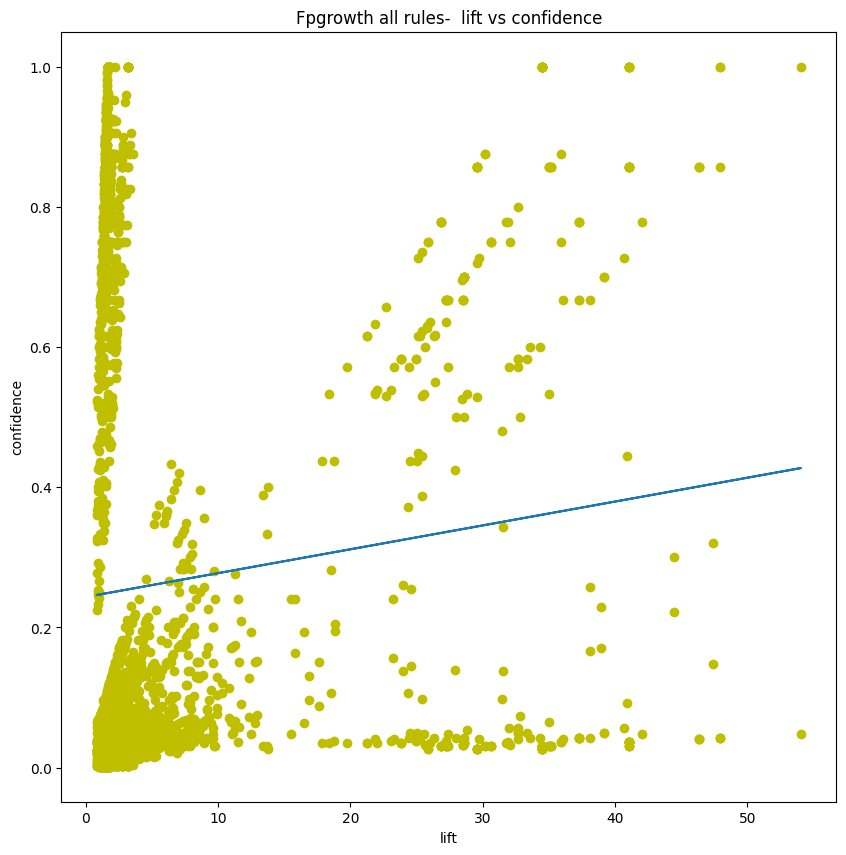

In [ ]:
plot_metrics_relationship(fpgrowth_rules, al='Fpgrowth all rules- ',col1='lift', col2='confidence')

In [ ]:
# rules selecting caravan policy
fpg_caravan = fpgrowth_rules2[ (fpgrowth_rules2['consequents']== {'caravan'}      )]
#fpg_caravan_2=fpg_caravan[  (fpg_caravan['confidence'] >= 0.2) ]
#fpg_caravan_2=fpg_caravan.sort_values(by =['confidence'], ascending=False)
fpg_caravan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2190,"(car, boat)",(caravan),0.003750,0.0675,0.001625,0.433333,6.419753,0.001372,1.645588,0.847409
2179,(boat),(caravan),0.005000,0.0675,0.001875,0.375000,5.555556,0.001537,1.492000,0.824121
2196,"(fire, boat)",(caravan),0.003125,0.0675,0.001125,0.360000,5.333333,0.000914,1.457031,0.815047
2203,"(car, fire, boat)",(caravan),0.002875,0.0675,0.001000,0.347826,5.152979,0.000806,1.429833,0.808261
803,"(social security, car, thirdparty_pvt, fire)",(caravan),0.006500,0.0675,0.001500,0.230769,3.418803,0.001061,1.212250,0.712129
777,"(social security, thirdparty_pvt, fire)",(caravan),0.007125,0.0675,0.001500,0.210526,3.118908,0.001019,1.181167,0.684250
791,"(social security, thirdparty_pvt, car)",(caravan),0.007500,0.0675,0.001500,0.200000,2.962963,0.000994,1.165625,0.667506
756,"(social security, thirdparty_pvt)",(caravan),0.008250,0.0675,0.001500,0.181818,2.693603,0.000943,1.139722,0.633980
763,"(social security, car, fire)",(caravan),0.009125,0.0675,0.001625,0.178082,2.638255,0.001009,1.134542,0.626680
1503,(disability),(caravan),0.004375,0.0675,0.000750,0.171429,2.539683,0.000455,1.125431,0.608914


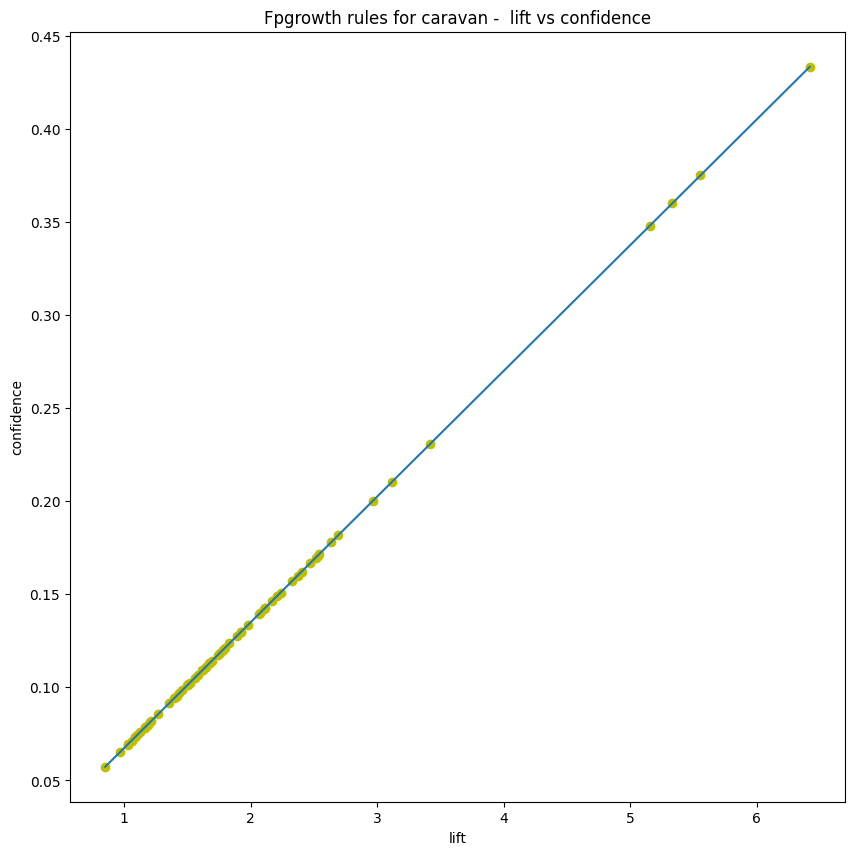

In [ ]:
plot_metrics_relationship(fpg_caravan, al='Fpgrowth rules for caravan - ',col1='lift', col2='confidence')

# Recommendations using Fpgrowth Algorithm

In [ ]:
fpgrowth_rules.shape

(2698, 10)

In [ ]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,2698):
        if item == fpgrowth_rules2.iloc[i,0]:
            recommend.append(fpgrowth_rules2.iloc[i,1])

    return recommend

**5 Recommendations with caravan product**

In [ ]:
# rules selecting caravan policy
product_name = {'caravan'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'car'})
frozenset({'fire'})
frozenset({'thirdparty_pvt'})
frozenset({'car', 'fire'})
frozenset({'thirdparty_pvt', 'fire'})


# Model Evaluation

One of the most important features of any frequent itemset mining algorithm is that it should take lower timing and memory.

Best algorithm is used in run time of 2 models.

**Calculating Run Time of Apriori Algorithm**

In [ ]:
import time

l=[0.0005,0.0006,0.0007,0.0008] # # selection of support
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

**Calculating Run Time of Fpgrowth Algorithm**

In [ ]:
l=[0.0005,0.0006,0.0007,0.0008] # selection of support
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

**Graph of Run Time between Apriori and Fpgrowth Algorithm**

<Axes: >

<Axes: >

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

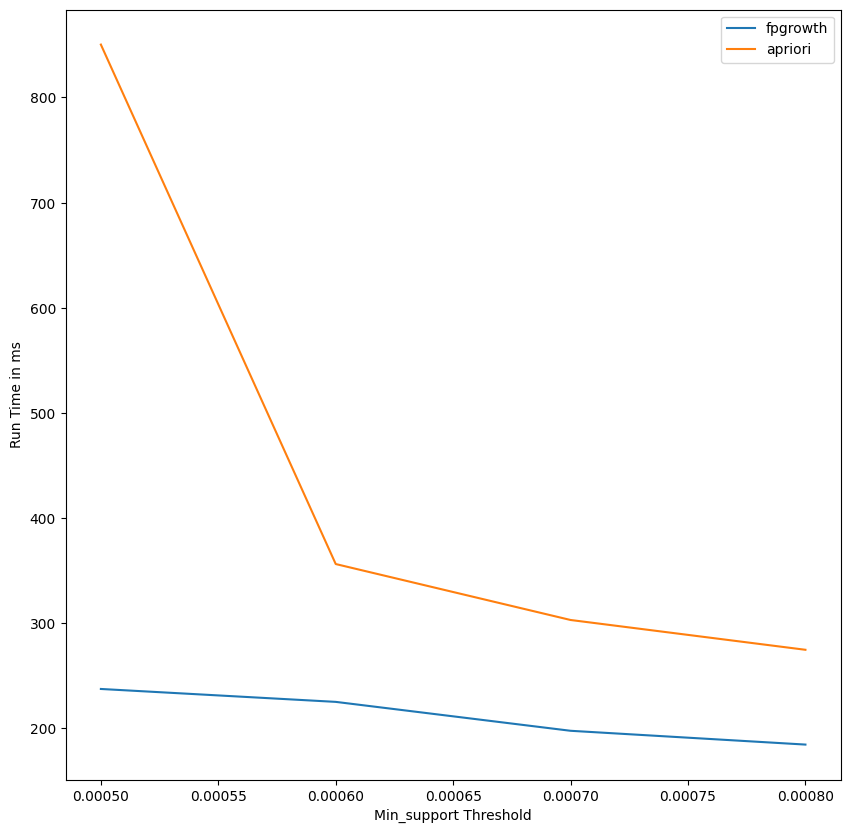

In [ ]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

plt.savefig("Ap- FPG Runtime")

FPgrowth is the best algorithm as it takes less run time

**Explain caravan customer** - using product details - choice of policies

**Model details**

Algorithm : Fpgrowth

minimum support 0.07%, metric="lift",min_threshold=0.8

**Results**

Caravan customers already have single policies car, fire or moped; customers who buy fire and car policies, moped and car policies.